# Statistical Inference.
## Data description

In [1]:
import pandas as pd
data = pd.read_csv("ACCIDENTS_GU_BCN_2013.csv", encoding='latin-1')
print data.columns

Index([u'Número d'expedient', u'Codi districte', u'Nom districte', u'NK barri',
       u'Nom barri', u'Codi carrer', u'Nom carrer', u'Num postal caption',
       u'Descripció dia setmana', u'Dia de setmana', u'Descripció tipus dia',
       u'NK Any', u'Mes de any', u'Nom mes', u'Dia de mes', u'Hora de dia',
       u'Descripció torn', u'Descripció causa vianant', u'Número de morts',
       u'Número de lesionats lleus', u'Número de lesionats greus',
       u'Número de víctimes', u'Número de vehicles implicats',
       u'Coordenada UTM (Y)', u'Coordenada UTM (X)'],
      dtype='object')


In [2]:
data['Date'] = data[u'Dia de mes'].apply(lambda x : \
               str(x)) + '-' +   \
               data[u'Mes de any'].apply(lambda x : \
               str(x)) 
accidents =data['Date'].value_counts() 
print "Mean:", accidents.mean(), \
               "; STD:", accidents.std()

Mean: 25.9095890411 ; STD: 9.10832496246


In [3]:
#Create a new column which is the date
data['Date'] = '2013-'+data['Mes de any'].apply(lambda x : str(x)) + '-' +  data['Dia de mes'].apply(lambda x : str(x))
data['Date'] = pd.to_datetime(data['Date'])
accidents = data.groupby(['Date']).size()
print "Mean:", accidents.mean(), "; STD:", accidents.std(), accidents.max(), accidents.min()

Mean: 25.9095890411 ; STD: 9.10832496246 48 5


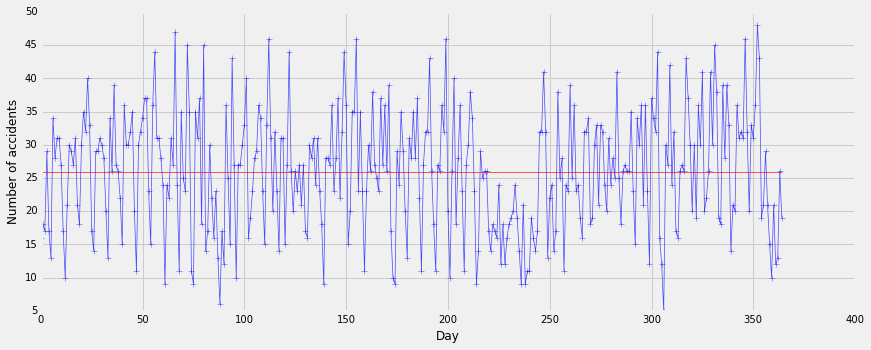

In [6]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline 
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(13, 5))
    plt.ylabel('Number of accidents')
    plt.xlabel('Day')
    plt.plot(range(0, 365), np.array(accidents), 'b-+', lw=0.7, alpha=0.7)
    plt.plot(range(0, 365), [accidents.mean()]*365, 'r-', lw=0.7, alpha=0.9)
plt.show()

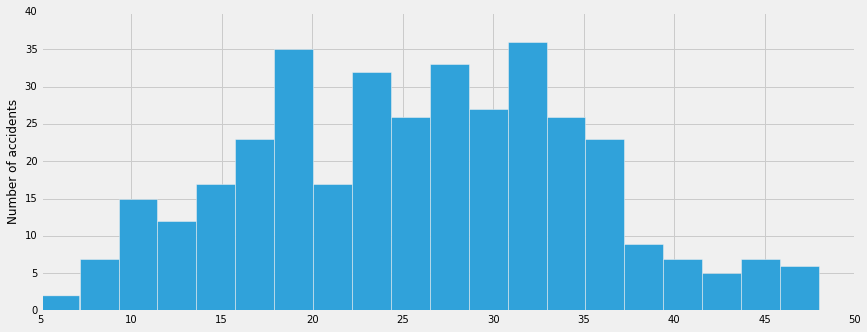

In [7]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(13, 5))
    plt.ylabel('Number of accidents')
    plt.hist(np.array(accidents), bins=20)
plt.show()

## Variability in estimates.

In [39]:

import numpy as np
a = accidents.to_frame()

for i in range(10):
    a['for_testing'] = False
    # get a 25% sample 
    sampled_ids = np.random.choice(a.index,
                                   size=np.int64(np.ceil(a.index.size * 0.25)),
                                   replace=False)
    a.ix[sampled_ids, 'for_testing'] = True
    accidents_sample = a[a['for_testing'] == True]
    print  'Mean', '%.2f' % accidents_sample[0].mean(), '- STD', '%.2f' % accidents_sample[0].std()


Mean 25.76 - STD 8.52
Mean 25.45 - STD 9.89
Mean 24.60 - STD 9.35
Mean 26.25 - STD 8.96
Mean 25.61 - STD 9.23
Mean 25.26 - STD 8.35
Mean 26.00 - STD 9.07
Mean 24.64 - STD 9.15
Mean 25.87 - STD 8.61
Mean 25.60 - STD 9.67


### Sampling distribution of point estimates


In [8]:
import numpy as np

# population
df = accidents.to_frame()    

N_test = 10000              
elements = 200             

# samples' mean array
means = [0] * N_test             

# sample generation
for i in range(N_test):          
    rows = np.random.choice(df.index.values, elements)
    sampled_df = df.ix[rows]
    means[i]=sampled_df.mean()

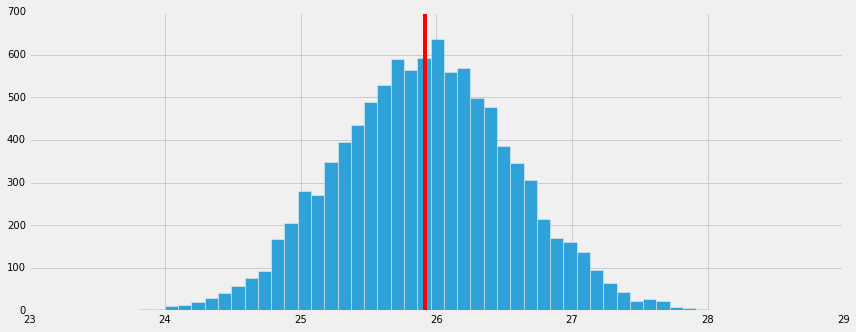

In [9]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline 

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(13, 5))
    plt.hist(np.array(means),bins=50)
    ax.axvline(x=np.array(means).mean(), ymin=0, ymax=700, color=[1, 0, 0])
plt.show()

### Standard error of the mean

It can be mathematically shown that given $n$ independent observations $\{ x_i \}_{i=1,..,n}$ from a population with a standard deviation $\sigma_x$, the standard deviation of the sample mean $\sigma_{\bar{x}}$, or **standard error** is:

$$ SE = \frac{\sigma_{x}}{\sqrt{n}} $$

This allows **to estimate the standard deviation of the sample mean** if we don't perform the simulation process (f.e. because we have no access to the population).

Usually, $\sigma_x$ is not known and it is substituted by its empirical estimate (that is sufficiently good of $n>30$ and the population distribution is not skewed).

In [10]:
import math
rows = np.random.choice(df.index.values, 200)
sampled_df = df.ix[rows]
est_sigma_mean = sampled_df.std()/math.sqrt(200)

print 'Direct estimation of STD:', \
       est_sigma_mean[0]
print 'Estimation of the STD by simulation:',  \
       np.array(means).std()

Direct estimation of STD: 0.657025331652
Estimation of the STD by simulation: 0.64788903208


We could also quantify the standard deviation of other estimates: median, standard deviation, etc. 

### Bootstrapping the standard error of the mean.

25.911461 0.63768362099


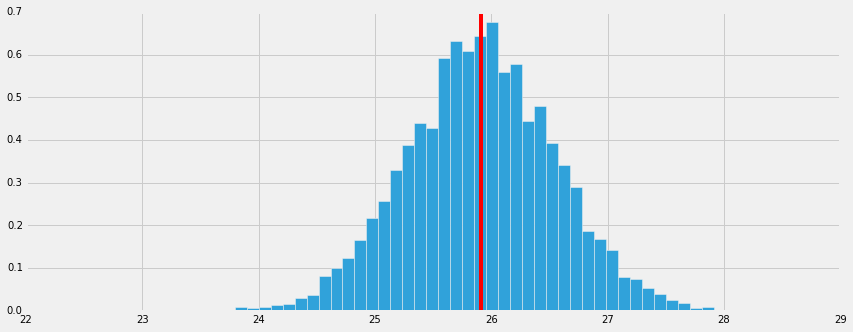

In [16]:
xbar = [0]*10000
X = accidents

for i in range(10000):
    sample = [X[_] for _ in np.random.randint(len(X), size=200)]
    xbar[i] = np.mean(sample)

print np.mean(xbar), np.std(xbar)
with plt.style.context('fivethirtyeight'):    
    fig, ax = plt.subplots(1, 1, figsize=(13, 5))
    plt.hist(xbar, bins=50, normed=True)
    ax.axvline(x=np.array(xbar).mean(), ymin=0.0, ymax=1.0, color=[1, 0, 0])


26.2491 0.843089075958


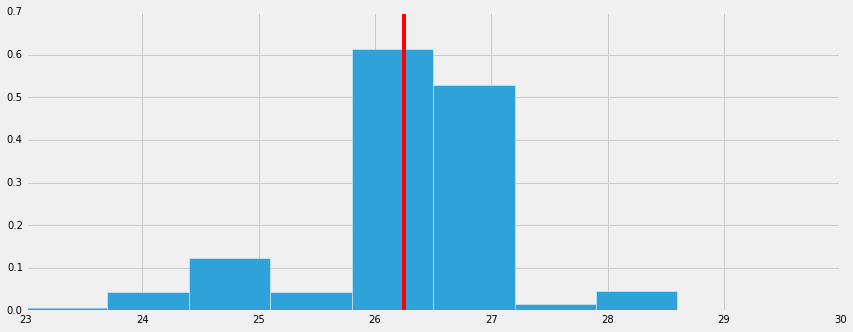

In [19]:
med = [0]*10000
X = accidents

for i in range(10000):
    sample = [X[_] for _ in np.random.randint(len(X), size=200)]
    med[i] = np.median(sample)

print np.mean(med), np.std(med)
with plt.style.context('fivethirtyeight'):    
    fig, ax = plt.subplots(1, 1, figsize=(13, 5))
    plt.hist(med, bins=10, normed=True)
    ax.axvline(x=np.array(med).mean(), ymin=0, ymax=1.0, color=[1, 0, 0])

## Confidence intervals.



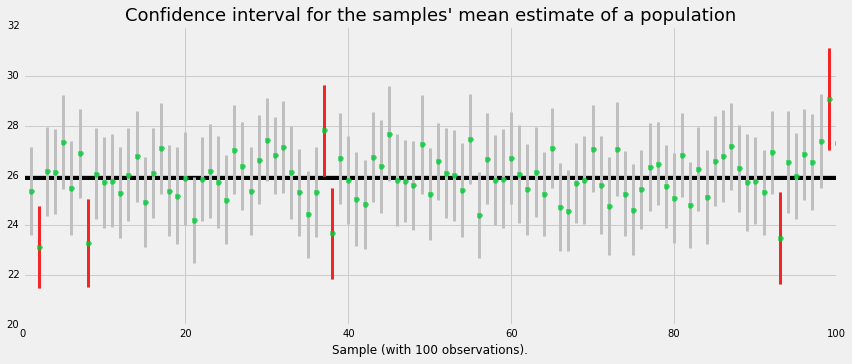

In [15]:
df = accidents   

n = 100                                               # number of observations
N_test = 100                                          # number of samples with n observations
means = np.array([0.0] * N_test)                      # samples' mean
s = np.array([0.0] * N_test)                          # samples' std
ci = np.array([[0.0,0.0]] * N_test)
tm = df.mean()                                        # "true" mean

for i in range(N_test):                               # sample generation and CI computation
    rows = np.random.choice(df.index.values, n)
    sampled_df = df.ix[rows]
    means[i]=sampled_df.mean()
    s[i]=sampled_df.std()
    ci[i] = means[i] + np.array([-s[i]*1.96/np.sqrt(n), s[i]*1.96/np.sqrt(n)])    

out1 = ci[:,0] > tm                                   # CI that do not contain the "true" mean
out2 = ci[:,1] < tm

with plt.style.context('fivethirtyeight'):            # plot of the CI distribution      
    fig, ax = plt.subplots(1, 1, figsize=(13, 5))
    ind = np.arange(1, N_test+1)
    ax.axhline(y=tm, xmin=0, xmax=N_test+1, color=[0, 0, 0])
    ci = np.transpose(ci)
    ax.plot([ind,ind], ci, color='0.75', marker='_', ms=0, linewidth=3)
    ax.plot([ind[out1], ind[out1]], ci[:, out1], color=[1, 0, 0, 0.8], marker='_', ms=0, linewidth=3)
    ax.plot([ind[out2], ind[out2]], ci[:, out2], color=[1, 0, 0, 0.8], marker='_', ms=0, linewidth=3)
    ax.plot(ind, means, color=[0, .8, .2, .8], marker='.', ms=10, linestyle='')
    ax.set_title("Confidence interval for the samples' mean estimate of a population",
             fontsize=18)
    ax.set_xlabel('Sample (with %d observations). '  %n, fontsize=12)
plt.show()

## Hypothesis testing

### Testing hypotheses using confidence intervals.

In [31]:
import pandas as pd
data = pd.read_excel("ACCIDENTS_GU_BCN_2010.xlsx", encoding='utf-8')
#Create a new column which is the date
data['Date'] = data['Dia de mes'].apply(lambda x : str(x)) + '-' +  data['Mes de any'].apply(lambda x : str(x))
data2 = data['Date']
counts2010 =data['Date'].value_counts()
print '2010:', counts2010.mean()

data = pd.read_excel("ACCIDENTS_GU_BCN_2013.xlsx", encoding='utf-8')
#Create a new column which is the date
data['Date'] = data['Dia de mes'].apply(lambda x : str(x)) + '-' +  data['Mes de any'].apply(lambda x : str(x))
data2 = data['Date']
counts2013 =data['Date'].value_counts()
print '2013:', counts2013.mean(), counts2013.std()

2010: 24.8109589041
2013: 25.9095890411 9.10832496246


In [32]:
n = len(counts2013)
mean= counts2013.mean()
s= counts2013.std()
ci = [mean - s*1.96/np.sqrt(n),  mean + s*1.96/np.sqrt(n)] 
print 'Mean:', mean, '| CI of the mean:',ci

Mean: 25.9095890411 | CI of the mean: [24.975156065800284, 26.844022016391499]


### Testing hypotheses using P-values.

In [33]:
m= len(counts2010)
n= len(counts2013)
p = abs(counts2010.mean() - counts2013.mean())
print 'm:',m, 'n:', n
print 'mean difference: ', p

m: 365 n: 365
mean difference:  1.09863013699


To approximate the p-value, we can pool the distributions, generate samples with size $m$ and $n$ and compute the difference in the mean.

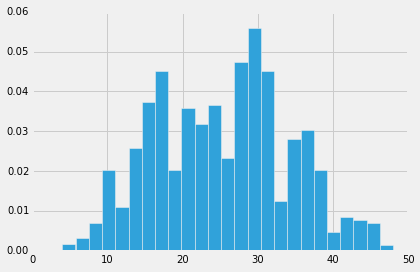

In [37]:
x = counts2010
y = counts2013
pool = np.concatenate([x,y])
np.random.shuffle(pool)

with plt.style.context('fivethirtyeight'):    # plotting the pooled distribution
    plt.hist(pool, bins=25, normed=True)

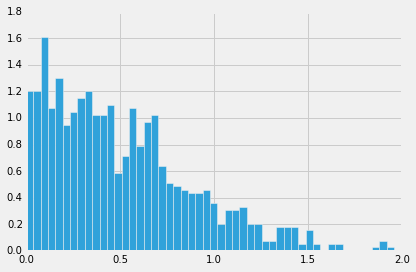

In [38]:
import random
N = 1000                                            # number of samples
diff = range(N)
for i in range(N):
    p1 = [random.choice(pool) for _ in xrange(m)]
    p2 = [random.choice(pool) for _ in xrange(n)]
    diff[i] = abs(np.mean(p1)-np.mean(p2))

with plt.style.context('fivethirtyeight'):          # plotting difference values 
    plt.hist(diff, bins=50, normed=True)

In [39]:
diff2 = np.array(diff)
w1 = np.where(diff2 > p)[0]      # counting how many differences are larger than the observed one
len(w1)

87

If there are $k$ sample pairs where the difference in mean is as big as or bigger than 0.07, the p-value is approximately $k/N$. 

In [41]:
print 'p-value (Simulation)=', len(w1)/float(N), '(', len(w1)/float(N)*100 ,'%)', 'Difference =', p
if len(w1)/float(N)<0.05:
    print 'The effect is likely'
else:
    print 'The effect is not likely'

p-value (Simulation)= 0.087 ( 8.7 %) Difference = 1.09863013699
The effect is not likely


The most common approach to hypothesis testing is to choose a threshold value for deciding is the effect is likely or not. A common choice is 5% (p-value $< 0.05$). 

So, the effect is not likely!

### Confidence intervals of the difference in two means.

The formula for the standard error of the difference in two means is similar to the formula
for other standard errors. Recall that the standard error of a single mean can be
approximated by: 

$$ SE_{\bar{x}_1} = \frac{\sigma_1}{\sqrt{n_1}} $$

The standard error of the difference of two sample means can be constructed from the
standard errors of the separate sample means:

$$ SE_{\bar{x}_1 - \bar{x}_2 } = \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}} $$

This would allow to define a test with the 95% confidence interval.

In [51]:
D = abs(counts2010.mean() - counts2013.mean())
SE = math.sqrt( (counts2010.std()**2 / m) + (counts2013.std()**2 / n) )

ci = [D - SE*1.96,  D + SE*1.96] 

print 'Difference in means', D, '| CI of the difference in means', ci
if (0 > ci[0]) and (0 < ci[1]):
    print 'We reject H1.The effect is not likely. '
else:
    print 'We do not reject H1. The effect is likely. '

Difference in means 1.09863013699 | CI of the difference in means [-0.18363414725705796, 2.3808944212296606]
We reject H1.The effect is not likely. 
